<a href="https://colab.research.google.com/github/prasanth1367/arrayelements/blob/master/BL_EN_U4EAC19042_ML_LAB_EXP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment no 8

Naga Prasanth Nimmagadda

BL.EN.U4EAC19042

CODE 1 clustering taking k=4

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


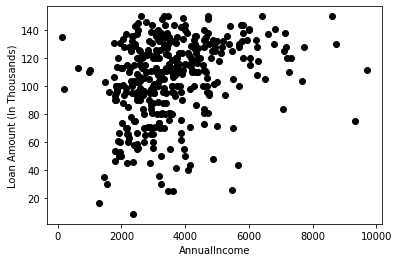

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

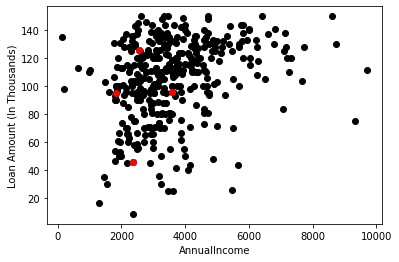

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=4
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [7]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


715.7180243921138
700.8964233221144
467.0654787479069
451.0951777919169
428.9622753676907
478.5763005256855
454.81439641624036
378.52262827202196
313.9943806943822
227.51447743744427
120.1136403604179
197.58399204814344
137.62770941969865
209.80343173607628
210.18163568605897
104.37592598909076
74.61998672467274
59.42850752383134
86.4759967061905
66.46585256786895
105.89524042040519
85.93895154883096
0.0


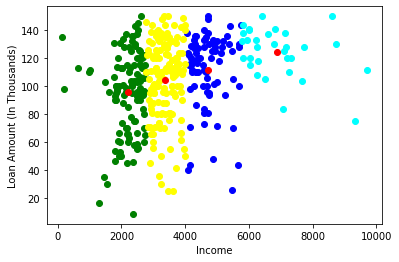

In [8]:
color=['blue','green','cyan','yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

CODE 2 clustering data using 3 features

In [9]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
data = pd.read_csv('clustering.csv')
data.head()




,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Text(0.5, 0, 'CoapplicantIncome')

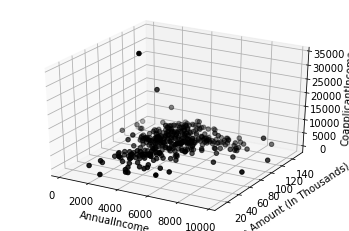

In [11]:
X = data[["LoanAmount","ApplicantIncome","CoapplicantIncome"]]
#Visualise data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X["ApplicantIncome"],X["LoanAmount"],X["CoapplicantIncome"],c='black')
ax.set_xlabel('AnnualIncome')
ax.set_ylabel('Loan Amount (In Thousands)')
ax.set_zlabel('CoapplicantIncome')

     LoanAmount  ApplicantIncome  CoapplicantIncome
98        121.0             3089             1280.0
378        71.0             2900                0.0
204       115.0             2400             2167.0
142        42.0             3716                0.0


Text(0.5, 0, 'CoapplicantIncome')

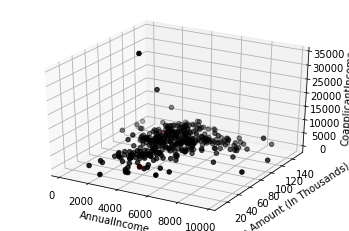

In [12]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X["ApplicantIncome"],X["LoanAmount"],X["CoapplicantIncome"],c='black')
ax.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],Centroids["CoapplicantIncome"],c='red')
ax.set_xlabel('AnnualIncome')
ax.set_ylabel('Loan Amount (In Thousands)')
ax.set_zlabel('CoapplicantIncome')


In [13]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d3=(row_c["CoapplicantIncome"]-row_d["CoapplicantIncome"])**2
            d=np.sqrt(d1+d2+d3)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome","CoapplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()+ (Centroids_new['CoapplicantIncome'] - Centroids['CoapplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome","CoapplicantIncome"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1056.4111606863842
820.809938068486
1915.7823720981078
2982.246829469408
4233.247822861923
8199.304240325568
6058.187925489243
0.0


Text(0.5, 0, 'CoapplicantIncome')

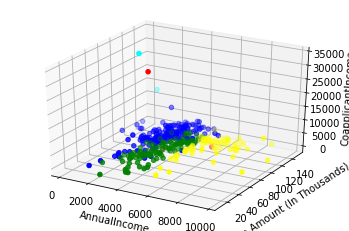

In [14]:
color=['blue','green','cyan','yellow']
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
for k in range(K):
  
    data=X[X["Cluster"]==k+1]
    ax.scatter(data["ApplicantIncome"],data["LoanAmount"],data["CoapplicantIncome"],c=color[k])
ax.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],Centroids["CoapplicantIncome"],c='red')
ax.set_xlabel('AnnualIncome')
ax.set_ylabel('Loan Amount (In Thousands)')
ax.set_zlabel('CoapplicantIncome')



Inference: i choose coapplicant as third feature because the other data is same but we having different values in coapplicant and we can show difference in clustering 

CODE 3 iris data set



In [16]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

data = pd.read_csv('Iris.csv')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


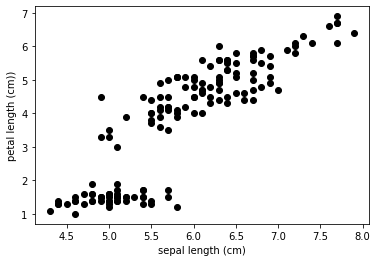

In [17]:
X = data[["sepal_length","petal_length"]]
#Visualise data points
plt.scatter(X["sepal_length"],X["petal_length"],c='black')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm))')
plt.show()

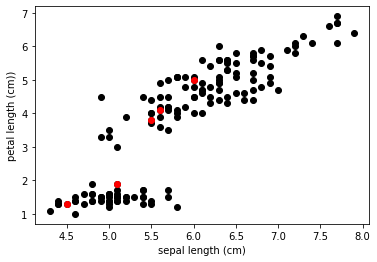

In [18]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["sepal_length"],X["petal_length"],c='black')
plt.scatter(Centroids["sepal_length"],Centroids["petal_length"],c='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm))')
plt.show()

In [19]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["sepal_length"]-row_d["sepal_length"])**2
            d2=(row_c["petal_length"]-row_d["petal_length"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["petal_length","sepal_length"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['petal_length'] - Centroids['petal_length']).sum() + (Centroids_new['sepal_length'] - Centroids['sepal_length']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["petal_length","sepal_length"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.5555225033172071
0.6255557394462972
0.44635562740546986
0.32926667867719406
0.30633444456973935
0.3821460161460162
0.24276673713883223
0.15097352260142927
0.05392496392496415
0.11453427895981072
0.1875667311411986
0.0


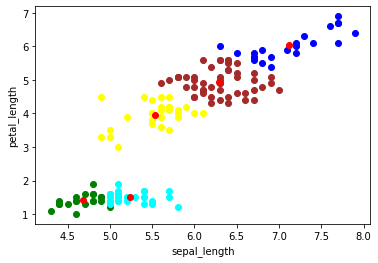

In [20]:
color=['blue','green','cyan','yellow','brown']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["sepal_length"],data["petal_length"],c=color[k])
plt.scatter(Centroids["sepal_length"],Centroids["petal_length"],c='red')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()